In [43]:
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('/content/labeled_data.csv')

In [45]:
df.shape

(24783, 7)

In [46]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [47]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [48]:
df.drop(columns = ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'],
        inplace = True)

In [49]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [50]:
df.isna().sum()

,0
class,0
tweet,0


In [51]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [52]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [53]:
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [54]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [55]:
df['processed_tweet'].iloc[800]

' WhatImCraving Peanut Butter Oreos  lt  '

In [56]:
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex= True)

In [57]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [58]:
df['processed_tweet_2'].iloc[800]

' WhatImCraving Peanut Butter Oreos lt '

In [59]:
df.drop(columns=['tweet', 'processed_tweet'], inplace = True)

In [60]:
nlp = spacy.load('en_core_web_sm')

In [61]:
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [62]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [63]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [64]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [65]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [66]:
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [67]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [68]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [69]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [70]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [71]:
vocab_size = 1000000
one_hot_repr = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [72]:
for i in range(0, 4):
  print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [73]:
for i in range(0, 4):
  print(one_hot_repr[i])

[501393, 682187, 309287, 690017, 498113, 663309, 657251, 951501, 909533, 100950, 821969]
[501393, 439471, 426338, 60592, 879989, 289960, 236933, 312666, 868246, 60592, 989350, 77400, 19870]
[501393, 230233, 497517, 501393, 48404, 126021, 591497, 927198, 748213, 267135, 730267, 175148]
[501393, 428153, 864588, 45104, 368070, 735885, 579896, 366147, 174768]


In [74]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_repr, padding = 'pre', maxlen = sentence_length)

In [75]:
for i in range(0, 4):
  print(embedded_tweet[i])

[     0      0      0      0      0      0      0      0      0 501393
 682187 309287 690017 498113 663309 657251 951501 909533 100950 821969]
[     0      0      0      0      0      0      0 501393 439471 426338
  60592 879989 289960 236933 312666 868246  60592 989350  77400  19870]
[     0      0      0      0      0      0      0      0 501393 230233
 497517 501393  48404 126021 591497 927198 748213 267135 730267 175148]
[     0      0      0      0      0      0      0      0      0      0
      0 501393 428153 864588  45104 368070 735885 579896 366147 174768]


In [76]:
x = np.array(embedded_tweet)
y = np.array(df['class'])

In [77]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [78]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

In [79]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [80]:
x.shape, X_train.shape, X_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [81]:
#creating model
dimension = 50

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension),
    #LSTM Layers (stacked)
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 994s 921ms/step - accuracy: 0.7783 - loss: 0.5002
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1013s 952ms/step - accuracy: 0.9523 - loss: 0.1473
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 1004s 917ms/step - accuracy: 0.9756 - loss: 0.0786
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 983s 918ms/step - accuracy: 0.9869 - loss: 0.0452
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 981s 917ms/step - accuracy: 0.9906 - loss: 0.0336
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 982s 922ms/step - accuracy: 0.9940 - loss: 0.0224
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 958s 901ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 998s 915ms/step - accuracy: 0.9963 - loss: 0.0128
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 918s 856ms/step - accuracy: 0.9970 - loss: 0.0110
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 977s 918ms/step - accuracy: 0.9975 - loss: 0.0081


In [84]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8032 - loss: 0.8896
Model Accuracy: 79.8683762550354


In [85]:
pred = np.argmax(model.predict(X_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [86]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [87]:
pred[:5]

array([1, 1, 0, 1, 2])

In [88]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      3812
           1       0.90      0.93      0.92      3807
           2       0.38      0.82      0.52       890

    accuracy                           0.80      8509
   macro avg       0.74      0.80      0.74      8509
weighted avg       0.87      0.80      0.81      8509



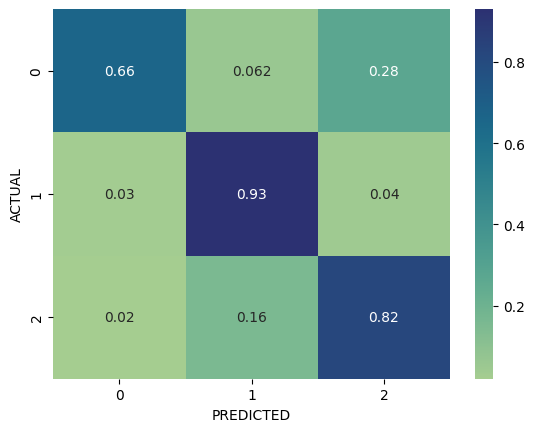

In [89]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot=True, cmap='crest');
plt.xlabel('PREDICTED');
plt.ylabel('ACTUAL');

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib

In [92]:
X = df['final_tweet']
y = df['class']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [94]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1,2)
)

In [95]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [96]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [97]:
y_pred = model.predict(X_test_vec)

In [98]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

Accuracy: 0.9047811176114585
F1 Score: 0.694173031081784
              precision    recall  f1-score   support

           0       0.66      0.18      0.28       286
           1       0.92      0.97      0.94      3838
           2       0.87      0.85      0.86       833

    accuracy                           0.90      4957
   macro avg       0.82      0.67      0.69      4957
weighted avg       0.89      0.90      0.89      4957



In [101]:
import os
os.makedirs("model", exist_ok=True)

In [102]:
import os
import joblib

os.makedirs("model", exist_ok=True)

joblib.dump(model, "model/hate_speech_model.pkl")
joblib.dump(vectorizer, "model/tfidf_vectorizer.pkl")

['model/tfidf_vectorizer.pkl']

In [103]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [104]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB()
}

In [105]:
for name, clf in models.items():
    clf.fit(X_train_vec, y_train)
    preds = clf.predict(X_test_vec)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("F1:", f1_score(y_test, preds, average='macro'))


Logistic Regression
Accuracy: 0.9047811176114585
F1: 0.694173031081784

Linear SVM
Accuracy: 0.9015533588864233
F1: 0.7129837537572152

Naive Bayes
Accuracy: 0.8339721605809965
F1: 0.4806003612506123
